Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!


parameters         lp__  accept_stat__   stepsize__  treedepth__  \
count       8000.000000    8000.000000  8000.000000  8000.000000   
mean        -131.157208       0.899380     0.845841     2.133125   
std            1.234579       0.118252     0.034950     0.502428   
min         -141.102878       0.035023     0.789264     1.000000   
25%         -131.706743       0.849893     0.833206     2.000000   
50%         -130.839162       0.942391     0.855594     2.000000   
75%         -130.250530       0.990144     0.868230     2.000000   
max         -129.646221       1.000000     0.882914     3.000000   

parameters  n_leapfrog__  divergent__     energy__        alpha         beta  \
count        8000.000000       8000.0  8000.000000  8000.000000  8000.000000   
mean            4.226000          0.0   132.641195     2.238826     4.090313   
std             1.949461          0.0     1.732141     0.221598     0.241658   
min             1.000000          0.0   129.709409     1.472839    


Building: found in cache, done.Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 8.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_48pz3qg2/model_buhk7y7m.stan', line 16, column 4 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per tran

parameters         lp__  accept_stat__   stepsize__  treedepth__  \
count       8000.000000    8000.000000  8000.000000  8000.000000   
mean       -1188.020077       0.908591     0.827294     2.223125   
std            1.228767       0.107870     0.059558     0.540950   
min        -1197.120685       0.320096     0.754078     1.000000   
25%        -1188.583208       0.861324     0.799273     2.000000   
50%        -1187.707850       0.946922     0.817496     2.000000   
75%        -1187.112016       0.992855     0.845517     3.000000   
max        -1186.508831       1.000000     0.920107     3.000000   

parameters  n_leapfrog__  divergent__     energy__        alpha         beta  \
count        8000.000000       8000.0  8000.000000  8000.000000  8000.000000   
mean            4.475250          0.0  1189.539636     2.215097     3.991079   
std             2.015104          0.0     1.745393     0.063539     0.062251   
min             1.000000          0.0  1186.635636     1.980229    

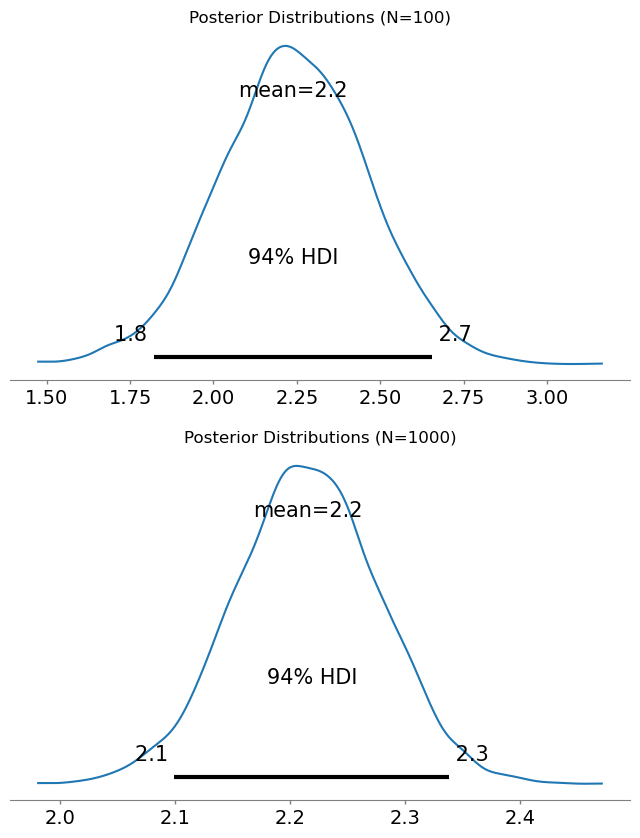

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import stan
import arviz as az
import nest_asyncio

nest_asyncio.apply()  # Fix for Jupyter Notebook async conflicts

# Simulate data
N = 100  # Number of observations
alpha_true = 2.3  # True intercept
beta_true = 4.0  # True slope
sigma_true = 2.0  # True noise level

x = np.random.normal(size=N)
y = alpha_true + beta_true * x + sigma_true * np.random.normal(size=N)

# Stan model definition
stan_code = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    sigma ~ inv_gamma(1, 1);
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    y ~ normal(alpha + beta * x, sigma);
}
"""

# Compile and sample
posterior = stan.build(stan_code, data={'N': N, 'x': x, 'y': y})
fit = posterior.sample(num_chains=4, num_samples=2000)

# Extract posterior samples
samples = fit.to_frame()

# Print summary statistics
summary = samples.describe()
print(summary)

# Analyze accuracy and uncertainty
alpha_post_mean = summary.loc['mean', 'alpha']
beta_post_mean = summary.loc['mean', 'beta']
sigma_post_mean = summary.loc['mean', 'sigma']
alpha_post_std = summary.loc['std', 'alpha']
beta_post_std = summary.loc['std', 'beta']
sigma_post_std = summary.loc['std', 'sigma']

print(f"Posterior Mean Estimates: Alpha={alpha_post_mean:.2f}, Beta={beta_post_mean:.2f}, Sigma={sigma_post_mean:.2f}")
print(f"Posterior Standard Deviations (Uncertainty): Alpha={alpha_post_std:.2f}, Beta={beta_post_std:.2f}, Sigma={sigma_post_std:.2f}")

# Repeat analysis with 10x data
N_large = 1000
x_large = np.random.normal(size=N_large)
y_large = alpha_true + beta_true * x_large + sigma_true * np.random.normal(size=N_large)

posterior_large = stan.build(stan_code, data={'N': N_large, 'x': x_large, 'y': y_large})
fit_large = posterior_large.sample(num_chains=4, num_samples=2000)

# Extract and analyze posterior with larger data
samples_large = fit_large.to_frame()
summary_large = samples_large.describe()
print(summary_large)

alpha_post_mean_large = summary_large.loc['mean', 'alpha']
beta_post_mean_large = summary_large.loc['mean', 'beta']
sigma_post_mean_large = summary_large.loc['mean', 'sigma']
alpha_post_std_large = summary_large.loc['std', 'alpha']
beta_post_std_large = summary_large.loc['std', 'beta']
sigma_post_std_large = summary_large.loc['std', 'sigma']

print(f"(10x Data) Posterior Mean Estimates: Alpha={alpha_post_mean_large:.2f}, Beta={beta_post_mean_large:.2f}, Sigma={sigma_post_mean_large:.2f}")
print(f"(10x Data) Posterior Standard Deviations (Uncertainty): Alpha={alpha_post_std_large:.2f}, Beta={beta_post_std_large:.2f}, Sigma={sigma_post_std_large:.2f}")

# Plot posterior distributions before and after increasing sample size
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
az.plot_posterior({"alpha": samples['alpha'], "beta": samples['beta'], "sigma": samples['sigma']}, ax=ax[0])
ax[0].set_title("Posterior Distributions (N=100)")
az.plot_posterior({"alpha": samples_large['alpha'], "beta": samples_large['beta'], "sigma": samples_large['sigma']}, ax=ax[1])
ax[1].set_title("Posterior Distributions (N=1000)")
plt.show()



1.Posterior Estimates with N=100 (Original Data)
Intercept (α): Posterior mean = 2.24, standard deviation = 0.22
Slope (β): Posterior mean = 4.09, standard deviation = 0.24
Noise (σ): Posterior mean = 2.22, standard deviation = 0.16
The estimates are fairly close to the true values (α=2.3, β=4.0, σ=2.0), but there is noticeable uncertainty, especially for α and β, as reflected in the standard deviations.

2.Posterior Estimates with N=1000 (10x Data)
Intercept (α): Posterior mean = 2.22, standard deviation = 0.06
Slope (β): Posterior mean = 3.99, standard deviation = 0.06
Noise (σ): Posterior mean = 1.99, standard deviation = 0.04
With 10x more data, the posterior means become even closer to the true values, and the uncertainty (standard deviation) decreases significantly. This confirms the expected result that more data reduces uncertainty and increases precision.